In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import skimage.morphology as sm
from scipy.ndimage.morphology import binary_hit_or_miss

(-0.5, 763.5, 558.5, -0.5)

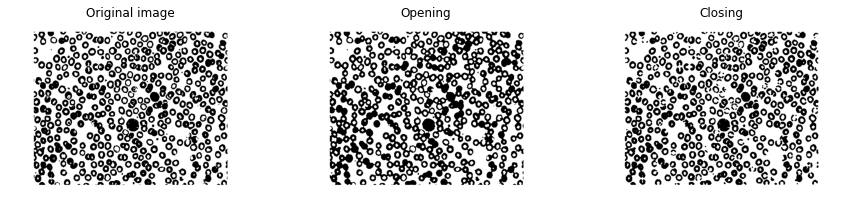

In [ ]:
cells_binary = imread('/content/drive/MyDrive/cells_binary.png', as_gray=True)

SE = sm.disk(2)
opening = sm.binary_opening(cells_binary, SE)
closing = sm.binary_closing(cells_binary, SE)

fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].imshow(cells_binary, cmap='gray')
axs[0].set_title('Original image')
axs[0].axis('off')
axs[1].imshow(opening, cmap='gray')
axs[1].set_title('Opening')
axs[1].axis('off')
axs[2].imshow(closing, cmap='gray')
axs[2].set_title('Closing')
axs[2].axis('off')

Text(0.5, 1.0, 'Mask3')

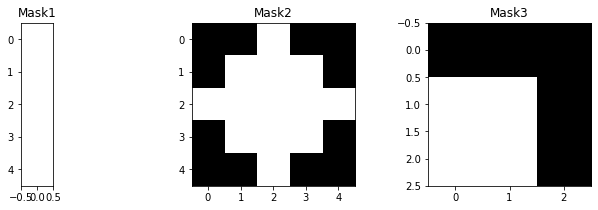

In [ ]:
blobs_inv = imread('/content/drive/MyDrive/blobs_inv.png', as_gray=True)

SE1 = np.ones((5,1))
SE2 = sm.disk(2)
SE3 = np.array([[0, 0, 0],
                [1, 1, 0],
                [1, 1, 0]])

fig, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].imshow(SE1, cmap='gray', vmin=0, vmax=1)
axs[0].set_title('Mask1')
axs[1].imshow(SE2, cmap='gray')
axs[1].set_title('Mask2')
axs[2].imshow(SE3, cmap='gray')
axs[2].set_title('Mask3')

(-0.5, 328.5, 271.5, -0.5)

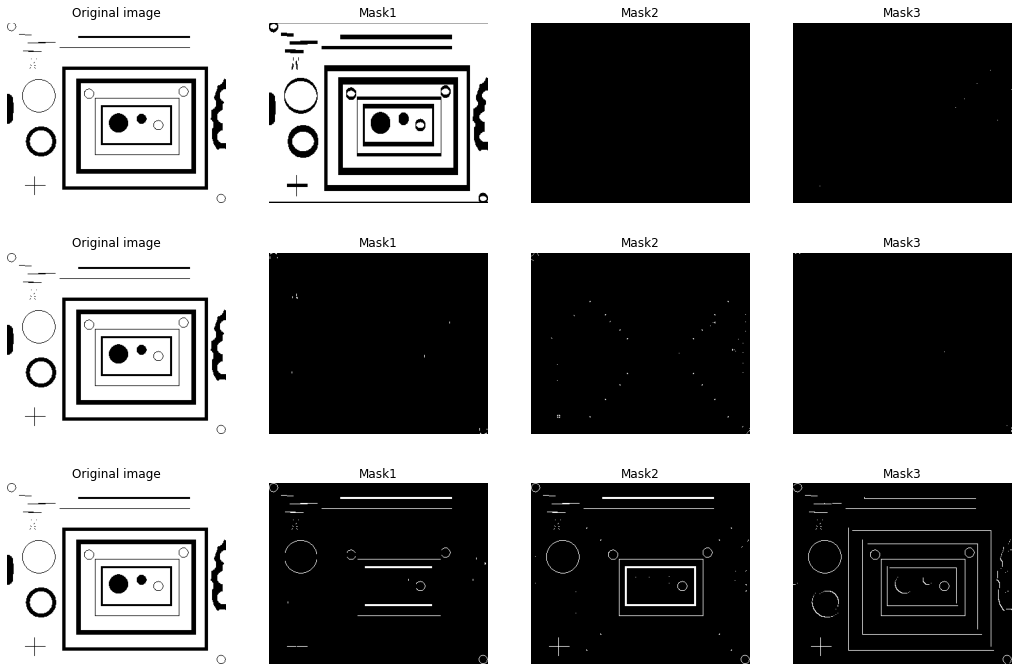

In [ ]:
hit_or_miss_1 = binary_hit_or_miss(blobs_inv, SE1)
hit_or_miss_2 = binary_hit_or_miss(blobs_inv, SE2)
hit_or_miss_3 = binary_hit_or_miss(blobs_inv, SE3)

topHat_1 = sm.white_tophat(blobs_inv, SE1)
topHat_2 = sm.white_tophat(blobs_inv, SE2)
topHat_3 = sm.white_tophat(blobs_inv, SE3)

bottomHat_1 = sm.black_tophat(blobs_inv, SE1)
bottomHat_2 = sm.black_tophat(blobs_inv, SE2)
bottomHat_3 = sm.black_tophat(blobs_inv, SE3)

fig, axs = plt.subplots(3, 4, figsize=(18,12))
axs[0,0].imshow(blobs_inv, cmap='gray')
axs[0,0].set_title('Original image')
axs[0,0].axis('off')
axs[0,1].imshow(hit_or_miss_1, cmap='gray')
axs[0,1].set_title('Mask1')
axs[0,1].axis('off')
axs[0,2].imshow(hit_or_miss_2, cmap='gray')
axs[0,2].set_title('Mask2')
axs[0,2].axis('off')
axs[0,3].imshow(hit_or_miss_3, cmap='gray')
axs[0,3].set_title('Mask3')
axs[0,3].axis('off')
axs[1,0].imshow(blobs_inv, cmap='gray')
axs[1,0].set_title('Original image')
axs[1,0].axis('off')
axs[1,1].imshow(topHat_1, cmap='gray')
axs[1,1].set_title('Mask1')
axs[1,1].axis('off')
axs[1,2].imshow(topHat_2, cmap='gray')
axs[1,2].set_title('Mask2')
axs[1,2].axis('off')
axs[1,3].imshow(topHat_3, cmap='gray')
axs[1,3].set_title('Mask3')
axs[1,3].axis('off')
axs[2,0].imshow(blobs_inv, cmap='gray')
axs[2,0].set_title('Original image')
axs[2,0].axis('off')
axs[2,1].imshow(bottomHat_1, cmap='gray')
axs[2,1].set_title('Mask1')
axs[2,1].axis('off')
axs[2,2].imshow(bottomHat_2, cmap='gray')
axs[2,2].set_title('Mask2')
axs[2,2].axis('off')
axs[2,3].imshow(bottomHat_3, cmap='gray')
axs[2,3].set_title('Mask3')
axs[2,3].axis('off')

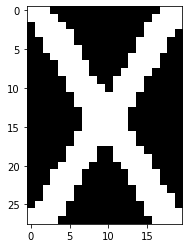

In [7]:
digits_binary = imread('/content/drive/MyDrive/digits_binary.png', as_gray=True)
digits_binary = np.where(digits_binary >= 0.5, 1, 0)
X = digits_binary[6:34,66:86]
plt.imshow(X, cmap='gray')

[[20 76]]


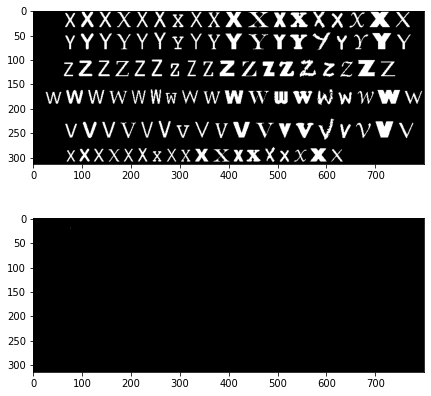

In [8]:
result = binary_hit_or_miss(digits_binary, X)
print(np.argwhere(result==True))
fig, axs = plt.subplots(2, 1, figsize=(7,7))
axs[0].imshow(digits_binary, cmap='gray')
axs[1].imshow(result, cmap='gray')
# plt.imshow(result, cmap='gray')

[]
[]
[]


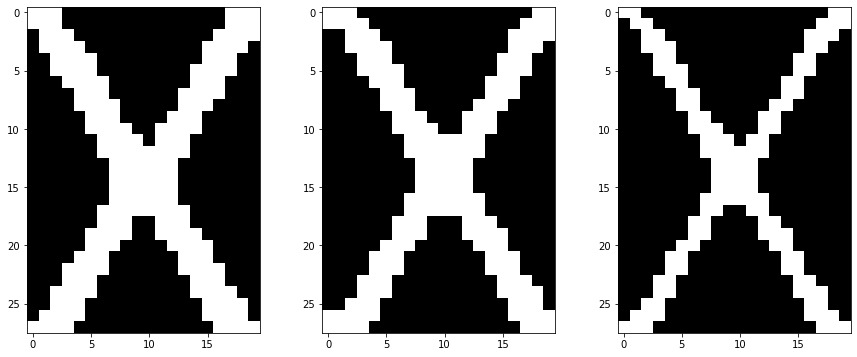

In [27]:
SE1 = np.array([[1],
               [1],
               ])
SE2 = np.array([[1,1]])
SE3 = np.array([[0,1,0],
                [1,1,1],
                [0,1,0]])
X_1 = sm.binary_erosion(X, SE1)
X_2 = sm.binary_erosion(X, SE2)
X_3 = sm.binary_erosion(X, SE3)
print(np.argwhere(binary_hit_or_miss(digits_binary, X_1)==True))
print(np.argwhere(binary_hit_or_miss(digits_binary, X_2)==True))
print(np.argwhere(binary_hit_or_miss(digits_binary, X_3)==True))

fig, axs = plt.subplots(1, 3, figsize=(15,6))
axs[0].imshow(X_1, cmap='gray')
axs[1].imshow(X_2, cmap='gray')
axs[2].imshow(X_3, cmap='gray')

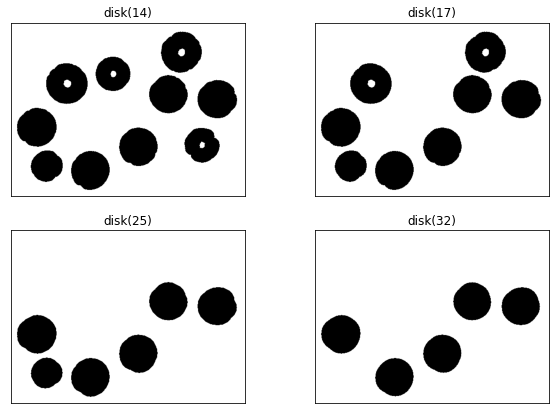

In [4]:
coins = imread('/content/drive/MyDrive/money_bin.jpg', as_gray=True)
coins = np.where(coins >= 10, 1, 0)

fig, axs = plt.subplots(2, 2, figsize=(10,7))
axs[0,0].imshow(sm.binary_closing(coins, sm.disk(14)), cmap='gray')
axs[0,0].set_title('disk(14)')
axs[0,0].get_xaxis().set_visible(False)
axs[0,0].get_yaxis().set_visible(False)
axs[0,1].imshow(sm.binary_closing(coins, sm.disk(17)), cmap='gray')
axs[0,1].set_title('disk(17)')
axs[0,1].get_xaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
axs[1,0].imshow(sm.binary_closing(coins, sm.disk(25)), cmap='gray')
axs[1,0].set_title('disk(25)')
axs[1,0].get_xaxis().set_visible(False)
axs[1,0].get_yaxis().set_visible(False)
axs[1,1].imshow(sm.binary_closing(coins, sm.disk(32)), cmap='gray')
axs[1,1].set_title('disk(32)')
axs[1,1].get_xaxis().set_visible(False)
axs[1,1].get_yaxis().set_visible(False)